In [1]:
%matplotlib inline
%pylab inline
from scipy import stats
from IPython.html.widgets import interact

Populating the interactive namespace from numpy and matplotlib


/home/vineet/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Text(0.5,1,'$\\hat{y}-y$')

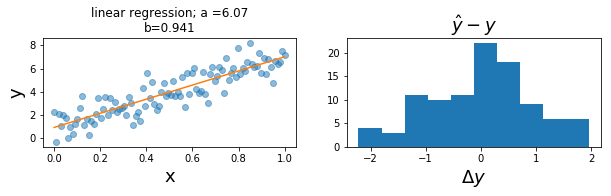

In [2]:
a = 6;b = 1 # parameters to estimate
x = linspace(0,1,100)
# x = rand(100)*100 # x does not have to be monotone for this to work 
y = a*x + np.random.randn(len(x)) +b

p,var_=np.polyfit(x,y,1,cov=True) # fit data to line
y_ = np.polyval(p,x) # estimated by linear regression 

# draw comparative fits and hisogram of errors
fig,axs=subplots(1,2)
fig.set_size_inches((10,2))
ax =axs[0]
ax.plot(x,y,'o',alpha=.5)
ax.plot(x,y_)
ax.set_xlabel("x",fontsize=18)
ax.set_ylabel("y",fontsize=18)
ax.set_title("linear regression; a =%3.3g\nb=%3.3g"%(p[0],p[1]))
ax = axs[1]
ax.hist(y_-y)
ax.set_xlabel(r"$\Delta y$",fontsize=18)
ax.set_title(r"$\hat{y}-y$",fontsize=18)
#ax.set_aspect(1/2)



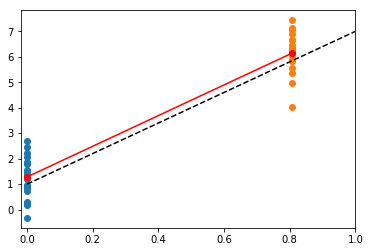

In [4]:
x0 =x[0]
xn =x[80]

y_0 = a*x0 + np.random.randn(20)+b
y_1 = a*xn + np.random.randn(20)+b

fig,ax=subplots()
ax.plot(x0*ones(len(y_0)),y_0,'o')
ax.plot(xn*ones(len(y_1)),y_1,'o')
ax.axis(xmin=-.02,xmax=1)

a_,b_=inv(np.matrix([[x0,1],[xn,1]])).dot(vstack([y_0,y_1]).mean(axis=1)).flat
x_array = np.array([x0,xn])
ax.plot(x_array,a_*x_array+b_,'-ro')
ax.plot(x,a*x+b,'k--')

In [5]:
def plot_2_estimator(n=50):
    x0 =x[0]
    xn =x[n]

    y_0 = a*x0 + np.random.randn(20)+b
    y_1 = a*xn + np.random.randn(20)+b

    fig,ax=subplots()
    ax.plot(x0*ones(len(y_0)),y_0,'o',alpha=.3)
    ax.plot(xn*ones(len(y_1)),y_1,'o',alpha=.3)
    ax.axis(xmin=-.25,xmax=1,ymax=10,ymin=-2)

    a_,b_=inv(np.matrix([[x0,1],[xn,1]])).dot(vstack([y_0,y_1]).mean(axis=1)).flat
    x_array = np.array([x0,x[-1]])
    ax.grid()
    ax.plot(x_array,a_*x_array+b_,'-ro')
    ax.plot(x,a*x+b,'k--');

interact(plot_2_estimator,n=(1,99,1));

A Jupyter Widget

Text(0.5,1,'var=0.0105 vs. 0.0418')

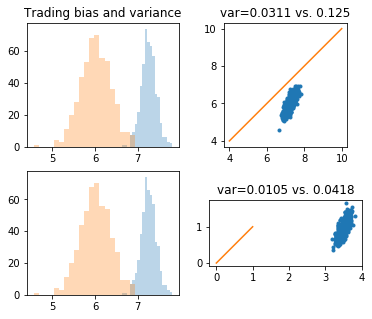

In [6]:
n = len(x)
one = ones((n,))

P_1 = ones((n,n))/n-eye(n)*1.35
#P_1 = ones((n,n))/n
P_x = outer(x,x)/dot(x,x)-eye(n)*1.3
x_1 = x-dot(P_1,x)
sumx = sum(x)
o=[]
ofit=[]
for i in range(500):
    y = a*x + np.random.randn(n)+b
    a_hat = dot(x_1,y)/dot(x_1,x)
    b_hat = dot(y,one-dot(P_x,one))/dot(one,one-dot(P_x,one))
    o.append((a_hat,b_hat))
    ofit.append(tuple(polyfit(x,y,1)))
    
ofit = array(ofit)
o = array(o)

fig,axs=subplots(2,2)
fig.set_size_inches((6,5))
ax=axs[0,0]
ax.set_title('Trading bias and variance')
ax.hist(o[:,0],20,alpha=.3)
ax.hist(ofit[:,0],20,alpha=.3)
ax=axs[0,1]
ax.plot(o[:,0],ofit[:,0],'.')
ax.plot(linspace(4,10,2),linspace(4,10,2))
ax.set_aspect(1)
ax.set_title('var=%3.3g vs. %3.3g'%(var(o[:,0]),var(ofit[:,0])))
ax=axs[1,0]
ax.hist(o[:,0],20,alpha=.3)
ax.hist(ofit[:,0],20,alpha=.3)
ax=axs[1,1]
ax.plot(o[:,1],ofit[:,1],'.')
ax.plot(linspace(0,1,3),linspace(0,1,3))
ax.set_aspect(1)
ax.set_title('var=%3.3g vs. %3.3g'%(var(o[:,1]),var(ofit[:,1])))

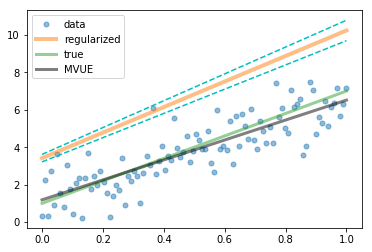

In [7]:
one = ones((n,))
xi=one-dot(P_x,one)
(a_,b_),var_= polyfit(x,y,1,cov=True)
sigma2_est = var(polyval([a_,b_],x)-y)

b_hat_var = sigma2_est*dot(xi,xi)/dot(one,xi)**2
a_hat_var = sigma2_est*dot(x_1,x_1)/dot(x_1,x)**2
a_hat_lo,a_hat_hi=stats.norm(a_hat,sqrt(a_hat_var)).interval(.95)
b_hat_lo,b_hat_hi=stats.norm(b_hat,sqrt(b_hat_var)).interval(.95)

plot(x,y,'o',alpha=.5,ms=5.,lw=4.,label='data')
plot(x,polyval([a_hat,b_hat],x),lw=4.,label='regularized',alpha=.5)
plot(x,polyval([a,b],x),lw=3.,label='true',alpha=.5)
plot(x,polyval(polyfit(x,y,1),x),lw=3.,label='MVUE',alpha=.5,color='k')
plot(x,polyval([a_hat_hi,b_hat_hi],x),'--c')
plot(x,polyval([a_hat_lo,b_hat_lo],x),'--c')
legend(loc=0);

A Jupyter Widget

<function __main__.plot_lin_regularizer>

In [9]:
# Multi-dimensional Gaussian Model

def lin_regress(x,y,lam=0,kap=0,alpha=0.95):
    'linear regression with optional regularization'
    n = len(x)
    sumx = sum(x)
    sumy = sum(y)
    one = ones((n,))
    P_1 = ones((n,n))/n-eye(n)*lam
    P_x = outer(x,x)/dot(x,x)-eye(n)*kap
    xi=one-dot(P_x,one)
    x_1 = x-dot(P_1,x)
    a_hat = dot(x_1,y)/dot(x_1,x)
    b_hat = dot(y,one-dot(P_x,one))/dot(one,one-dot(P_x,one))
    (a_,b_)= polyfit(x,y,1)
    sigma2_est = var(polyval([a_,b_],x)-y) # OLS for noise estimate
    b_hat_var = sigma2_est*dot(xi,xi)/dot(one,xi)**2
    a_hat_var = sigma2_est*dot(x_1,x_1)/dot(x_1,x)**2
    a_hat_lo,a_hat_hi=stats.norm(a_hat,sqrt(a_hat_var)).interval(alpha)
    b_hat_lo,b_hat_hi=stats.norm(b_hat,sqrt(b_hat_var)).interval(alpha)
    return (a_hat,b_hat,a_hat_hi-a_hat_lo,b_hat_hi-b_hat_lo)

In [10]:


def plot_lin_regularizer_band(lam= 0.0,kap=0.0):
    fig,ax = subplots()
    ax.plot(x,y,'o',alpha=.3)
    a_hat,b_hat,adelta,bdelta = lin_regress(x,y,lam=lam,kap=kap)
    ax.plot(x,polyval([a_hat,b_hat],x),color='k',lw=3.)
    ax.plot(x,polyval([a_hat+adelta/2,b_hat+bdelta/2],x),'--k')
    ax.plot(x,polyval([a_hat-adelta/2,b_hat-bdelta/2],x),'--k')
    ax.fill_between(x,polyval([a_hat+adelta/2,b_hat+bdelta/2],x),
                      polyval([a_hat-adelta/2,b_hat-bdelta/2],x),
                      color='gray',
                      alpha=.3)
    ax.set_title('95% confidence band')
    ax.axis(xmin=x[0],xmax=x[-1],ymin=-1,ymax=10)
interact(plot_lin_regularizer_band,lam=(0,0.3,.05),kap=(0,2,.1))



A Jupyter Widget

<function __main__.plot_lin_regularizer_band>